In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sudoku-3m.csv')

In [59]:
df.describe()

,id,clues,difficulty
count,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.500000e+06,2.430547e+01,1.238623e+00
std,8.660255e+05,1.102716e+00,1.272755e+00
min,1.000000e+00,1.900000e+01,0.000000e+00
25%,7.500008e+05,2.400000e+01,0.000000e+00
50%,1.500000e+06,2.400000e+01,1.200000e+00
75%,2.250000e+06,2.500000e+01,2.200000e+00
max,3.000000e+06,3.100000e+01,8.500000e+00


In [60]:
# 先把id列去掉，再把puzzle中的.换成0，比如.4.1..............653.....1.8.9..74...24..91.... to 040100000000000000653000001080900740002400910000
df = df.drop('id', axis=1)
df['puzzle'] = df['puzzle'].apply(lambda x: x.replace('.', '0'))

In [61]:
# 根据difficulty, 应该是0-10，每个区间给我取出100个，做成一个子集
# 创建一个空的 DataFrame，用于存放结果
result_df = pd.DataFrame()

# 定义 difficulty 的区间（0到10，每步间隔1）
difficulty_bins = list(range(0, 11))
difficulty_labels = [i for i in range(len(difficulty_bins)-1)]

# 为了分区添加 difficulty 区间列
df['difficulty_range'] = pd.cut(df['difficulty'], bins=difficulty_bins, labels=difficulty_labels, include_lowest=True)

# 从每个区间提取1000个样本
for label in difficulty_labels:
    subset = df[df['difficulty_range'] == label]
    sampled_subset = subset.sample(n=1000, random_state=42) if len(subset) >= 1000 else subset
    result_df = pd.concat([result_df, sampled_subset], ignore_index=True)

# 保存结果到一个新的 CSV 文件
result_df.to_csv('sudoku.csv', index=False)

In [62]:
result_df.describe()

,clues,difficulty
count,7034.000000,7034.000000
mean,24.187376,3.414188
std,1.116111,2.085217
min,20.000000,0.000000
25%,23.000000,1.800000
50%,24.000000,3.400000
75%,25.000000,5.200000
max,29.000000,8.500000


Text(0, 0.5, 'Count')

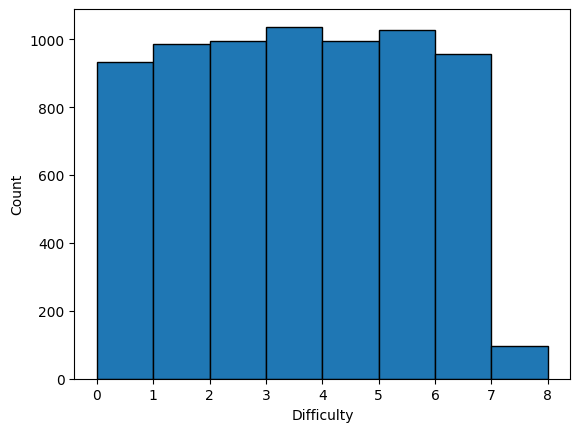

In [63]:
# 给我一个柱状图，是sudoku的难度分布
plt.hist(result_df['difficulty'], bins=range(0, 9), edgecolor='black')
# 很坐标纵坐标
plt.xlabel('Difficulty')
plt.ylabel('Count')


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('output1.csv')
df.describe()

,clues,difficulty,difficulty_range,time
count,774.000000,774.000000,774.000000,774.000000
mean,24.222222,3.786951,3.387597,6.038504
std,1.137266,2.293040,2.247241,16.042175
min,21.000000,0.000000,0.000000,0.019000
25%,23.250000,2.000000,1.000000,0.576000
50%,24.000000,3.800000,3.000000,1.819500
75%,25.000000,5.600000,5.000000,5.670000
max,28.000000,8.500000,8.000000,296.161000


In [45]:
df = pd.read_csv('output16.csv')
df.describe()

,clues,difficulty,difficulty_range,time
count,774.000000,774.000000,774.000000,774.00000
mean,24.222222,3.786951,3.387597,1.66963
std,1.137266,2.293040,2.247241,3.49066
min,21.000000,0.000000,0.000000,0.11400
25%,23.250000,2.000000,1.000000,0.56325
50%,24.000000,3.800000,3.000000,0.76300
75%,25.000000,5.600000,5.000000,1.26000
max,28.000000,8.500000,8.000000,48.17500
